This code will generate a csv file that give you the intensity variation of all of your ROI (pinhole area). And if you want, you can preview first ten ROI by uncommenting the code.

In [7]:
import numpy as np
from scipy.ndimage import label
import scipy.io
import tifffile
from PIL import Image
import matplotlib.pyplot as plt
from skimage import filters,measure
from skimage.filters import threshold_local

In [8]:
path = r'/Volumes/Tianxiao/Spinning_Disk/Buffer_treated/'
frames = 500
Mask = plt.imread('/Volumes/Tianxiao/Spinning_Disk/Mask/binary_mask.tif')
binary_image = np.mean(Mask[:,:,:3],axis = -1)

In [9]:
def generate_df(root,frame):
    image = []
    for i in range(1,frame+1):
        

        mat = root+'Frame_'+str(i)+'/worksapce.mat'
        # Load the .mat file
        mat_data = scipy.io.loadmat(mat)
        
        
        # Access a specific variable by name
        variable_name = 'pixxx'  # Replace with the actual variable name
        if variable_name in mat_data:
            # image = np.mat_data[variable_name]
            specific_data = mat_data[variable_name]
        # if i ==1:
        #     image = specific_data
        # else:
        #     image = np.stack([image,specific_data],axis = 0)
            image.append(specific_data)
    Image = np.array(image)
    
    return Image

In [10]:
def save_image(image,Type):
    if Type == 0:
        tifffile.imwrite(path+'origin.tif', image)
    elif Type == 1:
        imsr = Image.fromarray(image)
        imsr.save(path+'binary_mask.tif')
    elif Type == 2:
        tifffile.imwrite(path+'masked.tif',image)

/opt/anaconda3/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


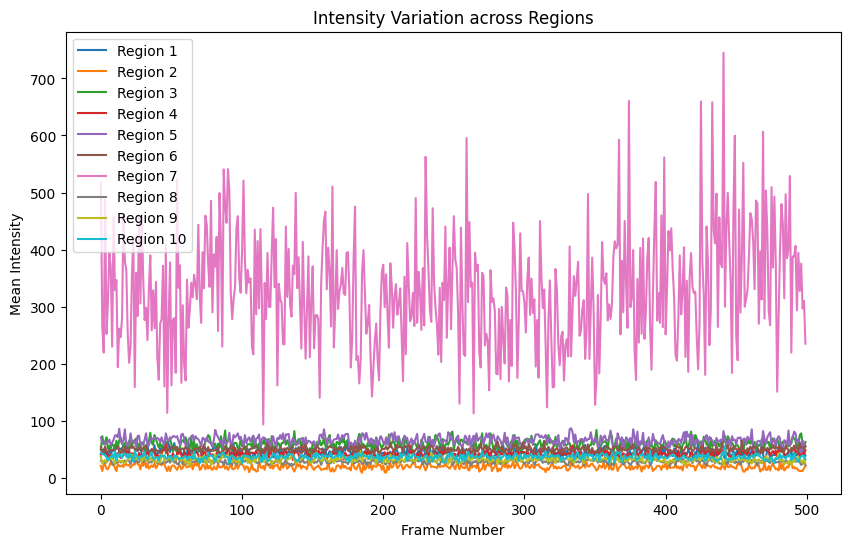

In [11]:
origin_image = generate_df(path,frames) 
save_image(origin_image,0)
labeled_image, num_features = label(binary_image)
intensity_variations = np.zeros((num_features, frames))
for frame_idx in range(origin_image.shape[0]):
    # Extract the frame
    frame = origin_image[frame_idx, :, :]
    
    # Loop through each region and calculate mean intensity
    for region_idx, region in enumerate(measure.regionprops(labeled_image, intensity_image=frame)):
        # Calculate mean intensity for each region in this frame
        intensity_variations[region_idx, frame_idx] = region.mean_intensity
        # intensity_variations[region_idx, frame_idx] = region.max_intensity    # Use this line to calculate max intensity instead of mean intensity
'''Uncomment the following code to plot the intensity variations across first ten regions'''
# plt.figure(figsize=(10, 6))
# for i in range(min(10, num_features)):  # Plot the first 10 regions or less
#     plt.plot(intensity_variations[i, :], label=f'Region {i+1}')
# plt.xlabel('Frame Number')
# plt.ylabel('Mean Intensity')
# plt.title('Intensity Variation across Regions')
# plt.legend()
# plt.savefig(path+'intensity_variation.pdf')
# plt.show()
'''`Uncomment the above code to plot the intensity variations across first ten regions'''
# Save the intensity variations to a CSV file
np.savetxt(path+'intensity_variations.csv', intensity_variations,delimiter=',')

In [12]:
imsr = Image.fromarray(labeled_image)
imsr.save(path+'labelled_image.tif')

